In [111]:
import cv2
import numpy as np
import pyvirtualcam
from numba import njit # conda install numba
import torch


In [112]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
from torch.optim import lr_scheduler
import numpy as np
import time

In [113]:
def entropy(image):
    
    p = np.array([(image==v).sum() for v in range(256)])
    p = p/p.sum()
    
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

In [114]:
def min(image):
    r_min = image[...,0].min()
    g_min = image[...,1].min()
    b_min = image[...,2].min()
    return r_min, g_min, b_min

In [115]:
def max(image):
    r_max = image[...,0].max()
    g_max = image[...,1].max()
    b_max = image[...,2].max()
    return r_max, g_max, b_max

In [116]:
def std(image):
    pixels = image.flatten()
    std_value = np.std(pixels)
    return std_value

In [117]:
def mean(image):
    average_all = np.average(image)
    average_three = np.average(image, axis = (0, 1))
    return average_all, average_three

In [118]:
def mode(image):
    pixels = image.flatten()
    pixel_counts = np.bincount(pixels)
    mode_value = np.argmax(pixel_counts)
    return mode_value

In [119]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2

def berechne_alles(frame):
   entropy1 = entropy(frame)
   r_min, g_min, b_min = min(frame)
   r_max, g_max, b_max = max(frame)
   std_value = std(frame)
   average_all, average_three = mean(frame)
   mode_value = mode(frame)

   list= [f"entropy: {round(entropy1,2)}",
   f"r_min: {r_min}, g_min: {g_min}, b_min: {b_min}",
   f"r_max: {r_max}, g_max: {g_max}, b_max: {b_max}",

   f"std_value: {round(std_value,2)}",

   f"average_all: {round(average_all,2)}",
   f"average_B: {round(average_three[0],2)}, average_G: {round(average_three[1],2)}, average_R: {round(average_three[2],2)}",
   f"mode_value: {mode_value}"]

   for i in range (6):
      y = 25 + i * 40
      cv2.putText(frame,
                    list[i],
                    (11, y),
                    font,
                    font_scale,
                    (0,0,255),
                    font_thickness,
                    font)
      #entropy1,  r_min, g_min, b_min,  r_max, g_max, b_max, std_value,  average_all, average_three, mode_value   
   return frame


In [120]:

def draw_text(image, text, position,color=(0,0,255)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)

    x, y = position
    cv2.putText(image, text, (x, y), font, font_scale, color, font_thickness)

    return image

In [121]:
def equalizeHist(frame):
    new_frame = cv2.equalizeHist(frame)
    return new_frame

In [122]:
def apply_blur(img):
   ksize = (15, 15)
   kernel = np.ones(ksize, dtype=np.float32) / (ksize[0] * ksize[1])
   blurred = cv2.filter2D(img, -1, kernel)
   return blurred

In [123]:
def apply_black_and_white_filter(frame): 
    grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, black_and_white_frame = cv2.threshold(grayscale_frame, 127, 255, cv2.THRESH_BINARY)
    black_and_white_frame_bgr = cv2.cvtColor(black_and_white_frame, cv2.COLOR_GRAY2BGR)

    return black_and_white_frame_bgr

In [124]:
def lin(image, c_1, c_2):
    for i in range(3):  # Iterieren über die Kanäle (0: Blau, 1: Grün, 2: Rot)
        channel = image[:, :, i]
        channel_min = np.min(channel)
        channel_max = np.max(channel)
        # Lineare Transformation für den aktuellen Kanal
        image[:, :, i] = ((c_2 * channel) + (c_1 * c_2))

    # Begrenzen Sie die Werte auf den Bereich von 0 bis 255
    #ima = np.clip(result, 0, 255).astype(np.uint8)
    return image






In [125]:
#model_path = '/Users/abdullah/Downloads/SGD.pt' 
model_path ='/Users/abdullah/Downloads/1111.pt'

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [126]:
class_labels = ['Happy','Neutral']

def detect_objects(image):
    resized_image = cv2.resize(image, (48, 48))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    input_image = np.transpose(resized_image, (2, 0, 1)) / 255.0
    input_tensor = torch.tensor(input_image, dtype=torch.float32).unsqueeze(0)
    
    #input_image = np.transpose(gray_image, (2, 0, 1)) / 255.0
    #input_tensor = torch.tensor(input_image, dtype=torch.float32).unsqueeze(0)

    with torch.no_grad():
        predictions = model(input_tensor)
    predicted_index = torch.argmax(predictions).item()

    predicted_class = class_labels[predicted_index]

    #cv2.putText(image, predicted_class, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return predicted_class,predictions

In [127]:
import cv2
import cvzone
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("/Users/abdullah/Downloads/snap_dead-main/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/Users/abdullah/Downloads/haarcascade_eye.xml")



In [128]:
padding = 0
def face_eye_ded(frame):
    face_image = None
    img = frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        face_image = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)  

    return img,face_image

In [129]:
def initialize_hist_figure():
    '''
    Usually called only once to initialize the hist figure.
    Do not change the essentials of this function to keep the performance advantages.
    https://www.youtube.com/watch?v=_NNYI8VbFyY
    '''
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.set_xlim([-0.5, 255.5])
    # fixed size (you can normalize your values between 0, 3 or other ranges to never exceed this limit)
    ax.set_ylim([0,3])
    fig.canvas.draw()
    background = fig.canvas.copy_from_bbox(ax.bbox)
    def_x_line = np.arange(0, 256, 1)
    # def_y_line = np.zeros(shape=(256,))
    r_plot = ax.plot(def_x_line, def_x_line, 'r', animated=True)[0]
    g_plot = ax.plot(def_x_line, def_x_line, 'g', animated=True)[0]
    b_plot = ax.plot(def_x_line, def_x_line, 'b', animated=True)[0]
    
    return fig, ax, background, r_plot, g_plot, b_plot



def update_histogram(fig, ax, background, r_plot, g_plot, b_plot, r_bars, g_bars, b_bars):
    '''
    Uses the initialized figure to update it accordingly to the new values.
    Do not change the essentials of this function to keep the performance advantages.
    '''
    fig.canvas.restore_region(background)        
    r_plot.set_ydata(r_bars)        
    g_plot.set_ydata(g_bars)        
    b_plot.set_ydata(b_bars)

    ax.draw_artist(r_plot)
    ax.draw_artist(g_plot)
    ax.draw_artist(b_plot)
    fig.canvas.blit(ax.bbox)
    
    

def plot_overlay_to_image(np_img, plt_figure):
    '''
    Use this function to create an image overlay.
    You must use a matplotlib figure object.
    Please consider to keep the figure object always outside code loops (performance hint).
    Use this function for example to plot the histogram on top of your image.
    White pixels are ignored (transparency effect)-
    Do not change the essentials of this function to keep the performance advantages.
    '''
    
    rgba_buf = plt_figure.canvas.buffer_rgba()
    (w, h) = plt_figure.canvas.get_width_height()
    imga = np.frombuffer(rgba_buf, dtype=np.uint8).reshape(h,w,4)[:,:,:3]
    
    # ignore white pixels
    plt_indices = np.argwhere(imga < 255)

    # add only non-white values
    height_indices = plt_indices[:,0]
    width_indices = plt_indices[:,1]
    
    np_img[height_indices, width_indices] = imga[height_indices, width_indices]

    return np_img



def plot_strings_to_image(np_img, list_of_string, text_color=(255,0,0), right_space=400, top_space=50):
    '''
    Plots the string parameters below each other, starting from top right.
    Use this function for example to plot the default image characteristics.
    Do not change the essentials of this function to keep the performance advantages.
    '''
    y_start = top_space
    min_size = right_space
    line_height = 20
    (h, w, c) = np_img.shape
    if w < min_size:
        raise Exception('Image too small in width to print additional text.')
        
    if h < top_space + line_height:
        raise Exception('Image too small in height to print additional text.')
    
    y_pos = y_start
    x_pos = w - min_size

    for text in list_of_string:
        if y_pos >= h:
            break
        # SLOW!
        np_img = cv2.putText(cv2.UMat(np_img), text, (x_pos, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.8, text_color, 2)
        y_pos += line_height

    if type(np_img) is cv2.UMat:
        np_img = np_img.get()

    return np_img

In [130]:
def histogram_figure_numba(image):
    l = {}
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist_normalized = hist / np.max(hist) * 1
        l[col] = hist_normalized
    
    return l['r'], l['g'], l['b']

In [131]:
def eq(frame):

    img_yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output

klass:--  0
klass:--  25
klass:--  50
klass:--  75
klass:--  100
klass:--  125
klass:--  150
klass:--  175
klass:--  200
klass:--  225
klass:--  250
klass:--  275
klass:--  300
klass:--  325
klass:--  350
klass:--  375
klass:--  400
klass:--  425
klass:--  450
klass:--  475
klass:--  500
klass:--  525
klass:--  550
klass:--  575
klass:--  600
klass:--  625
klass:--  650
klass:--  675
klass:--  700
klass:--  725
klass:--  750
klass:--  775
klass:--  800
klass:--  825
klass:--  850
klass:--  875
klass:--  900
klass:--  925
klass:--  950
klass:--  975
klass:--  1000
klass:--  1025
klass:--  1050
klass:--  1075
klass:--  1100
klass:--  1125
klass:--  1150
klass:--  1175
klass:--  1200
klass:--  1225
klass:--  1250
klass:--  1275
klass:--  1300
klass:--  1325
klass:--  1350
klass:--  1375
klass:--  1400
klass:--  1425
klass:--  1450
klass:--  1475
klass:--  1500
klass:--  1525
klass:--  1550
klass:--  1575
klass:--  1600
klass:--  1625
klass:--  1650
klass:--  1675
klass:--  1700
klass:--  

KeyboardInterrupt: 

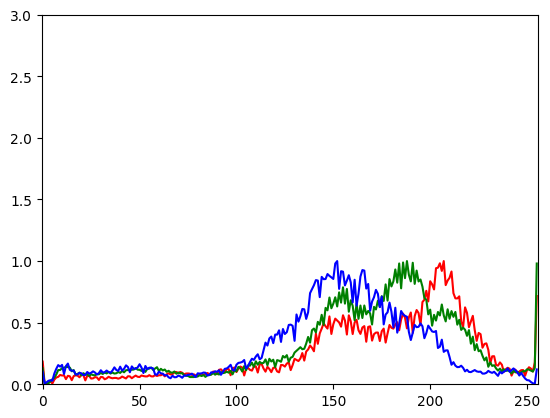

In [132]:
video_capture = cv2.VideoCapture(0)
frame_counter = 0
old_pred = '-'
ee= '-'

fig, ax, background, r_plot, g_plot, b_plot = initialize_hist_figure()

with pyvirtualcam.Camera(width=1280, height=720, fps=30) as virtual_cam:
    while True:
        ret, frame = video_capture.read()
        if not ret or frame is None or frame.size == 0:
            print("Das Eingangsbild ist leer oder konnte nicht gelesen werden.")
            continue

        frame = cv2.resize(frame, (1280, 720))
        #*********Gesicht Erkennung & klassifkation**********
        frame1, f_image = face_eye_ded(frame)
        if frame is None or frame.size == 0:
            frame1 = frame
        else:
            frame = frame1
        if frame_counter % 25 == 0:
            if f_image is None or f_image.size == 0:
                continue
            #print("klass:-- ", frame_counter)
            old_pred,_ = detect_objects(f_image)
        frame_counter += 1

        #****************************************************

        #******************* Werte **************************
        #frame = berechne_alles(frame)
        #****************************************************


        #******************* Lin ****************************
        #frame = lin(frame,-50,-0.25)
        #****************************************************



        #******************* equalize ***********************
        #frame = eq(frame)
        #****************************************************


        # Load the histogram values
        r_bars, g_bars, b_bars = histogram_figure_numba(frame)
        # Update the histogram with new data
        update_histogram(fig, ax, background, r_plot, g_plot, b_plot, r_bars, g_bars, b_bars)


        #******************* Effekt *************************
        if old_pred == "Neutral":
            frame = apply_blur(frame)
        #****************************************************

        #************** Filter******************
      #  frame = apply_blur(frame)

        # uses the figure to create the overlay
        frame = plot_overlay_to_image(frame, fig)



        frame = draw_text(frame, old_pred , (800, 200))
        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
        virtual_cam.send(frame)
        virtual_cam.sleep_until_next_frame()

In [ ]:
def Histogram_Computation(Image):
	Image_Height = Image.shape[0]
	Image_Width = Image.shape[1]
	Image_Channels = Image.shape[2]
	
	Histogram = np.zeros([256, Image_Channels], np.int32)
	
	for x in range(0, Image_Height):
		for y in range(0, Image_Width):
			for c in range(0, Image_Channels):
					Histogram[Image[x,y,c], c] +=1
	
	return Histogram


def Plot_Histogram(Histogram):
	plt.figure()
	plt.title("Color Image Histogram")
	plt.xlabel("Intensity Level")
	plt.ylabel("Intensity Frequency")
	plt.xlim([0, 256])
	plt.plot(Histogram[:,0],'b') # This is to Plot Blue Channel with Blue Color
	plt.plot(Histogram[:,1],'g') # This is to Plot Green Channel with Green Color
	plt.plot(Histogram[:,2],'r') # This is to Plot Red Channel with Red Color
	plt.savefig("Color_Histogram.jpg")

In [ ]:
def equalize_histogram(image):
    # Calculate histogram for each color channel
    hist_r, bins_r = np.histogram(image[:, :, 0].flatten(), bins=256, range=[0, 256])
    hist_g, bins_g = np.histogram(image[:, :, 1].flatten(), bins=256, range=[0, 256])
    hist_b, bins_b = np.histogram(image[:, :, 2].flatten(), bins=256, range=[0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf_r = hist_r.cumsum()
    cdf_g = hist_g.cumsum()
    cdf_b = hist_b.cumsum()

    # Normalize CDF
    cdf_r = (cdf_r / float(cdf_r.max())) * 255
    cdf_g = (cdf_g / float(cdf_g.max())) * 255
    cdf_b = (cdf_b / float(cdf_b.max())) * 255

    # Equalize image using CDF values
    equalized_image = np.empty_like(image)
    equalized_image[:, :, 0] = np.interp(image[:, :, 0], bins_r[:-1], cdf_r)
    equalized_image[:, :, 1] = np.interp(image[:, :, 1], bins_g[:-1], cdf_g)
    equalized_image[:, :, 2] = np.interp(image[:, :, 2], bins_b[:-1], cdf_b)

    return equalized_image